In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
new_model = automap_base()
# reflect the tables
new_model.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
new_model.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = new_model.classes.measurement
station = new_model.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_yr = int(last_date[0][:4])
last_m = int(last_date[0][5:7])
last_d = int(last_date[0][8:])
print(f"{last_yr}-{last_m}-{last_d}")
last_date

2017-8-23


('2017-08-23',)

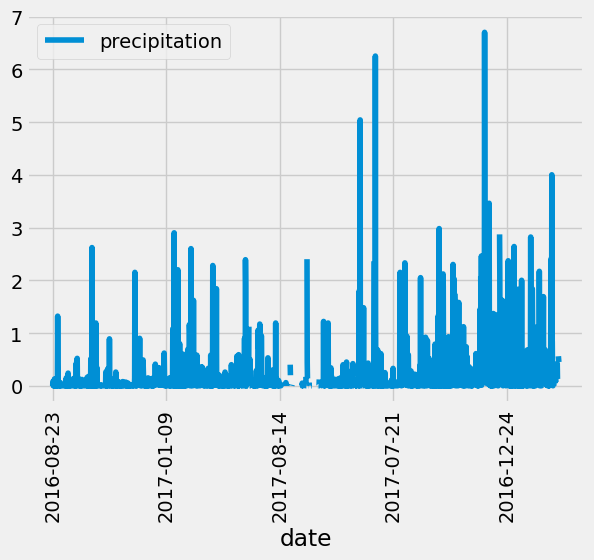

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
queries_db = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).all()
queries_db
# Sort the dataframe by date
queries_df = pd.DataFrame(queries_db, columns=['date', 'precipitation'])
queries_df.set_index('date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
queries_df.plot(rot=90)
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = queries_df.describe()
summary_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
query_stations = session.query(station).count()
query_stations

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
query_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
query_temp

[(54.0, 85.0, 71.66378066378067)]

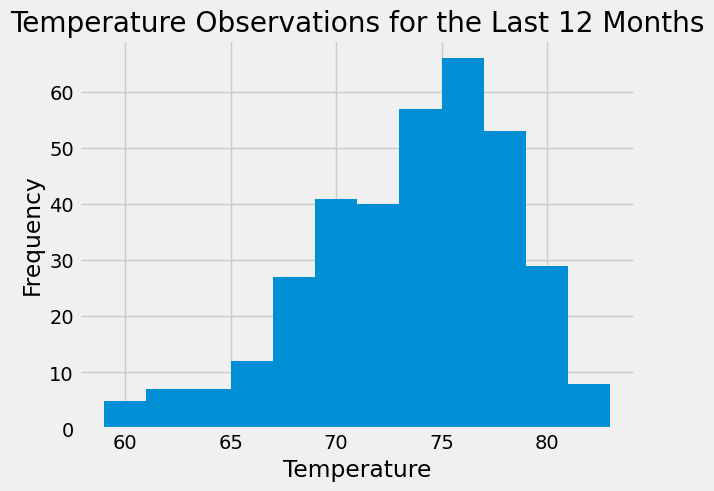

In [23]:
# Query the last 12 months of temperature observation data for the most active station
query_temp_last = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= query_date).all()

# Convert the query results into a list of temperatures
temps = [temp[0] for temp in query_temp_last]

# Plot the results as a histogram
plt.hist(temps, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Last 12 Months')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()